# Multivariate Classification

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator
import sktime
from sktime.utils.data_io import load_from_tsfile_to_dataframe

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sktime.classification.compose import ComposableTimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sktime.utils.slope_and_trend import _slope

from sklearn.metrics import plot_confusion_matrix

import csv

In [2]:
#X, y = load_from_tsfile_to_dataframe("haptic_data_1.ts", replace_missing_vals_with='NaN')
X_f, y_f = load_from_tsfile_to_dataframe("haptic_data_2.ts", replace_missing_vals_with='NaN')




In [3]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=.2, random_state=42)

In [4]:
#print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train_f.shape, y_train_f.shape, X_test_f.shape, y_test_f.shape)

(62, 9) (62,) (16, 9) (16,)


In [13]:
#X_train.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8
31,0 0.011775 1 0.031160 2 0...,0 0.034146 1 0.092312 2 0.14...,0 0.018475 1 0.069956 2 0.12...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000685 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
58,0 0.008948 1 0.026522 2 0...,0 0.023611 1 0.071059 2 0.11...,0 0.011090 1 0.051295 2 0.09...,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 -0.000472 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0.00...
9,0 0.009843 1 0.027574 2 0...,0 0.025559 1 0.073433 2 0.12...,0 0.012395 1 0.053582 2 0.10...,0 0.00 1 0.00 2 0.00 3 ...,0 0.000000 1 -0.000524 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
5,0 0.008990 1 0.026636 2 0...,0 0.020949 1 0.063300 2 0.10...,0 9.835743e-03 1 4.571888e-02 2 ...,0 0.00000 1 0.00000 2 0.0000...,0 0.000000 1 -0.000476 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
35,0 0.009316 1 0.026887 2 0...,0 0.021790 1 0.063960 2 0.10...,0 0.010403 1 0.046361 2 0.08...,0 0.00000 1 0.00000 2 0.0000...,0 0.000000 1 -0.000491 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0.00...


In [7]:
X_train_f.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8
31,0 0.011775 1 0.031160 2 0...,0 0.034146 1 0.092312 2 0.14...,0 0.018475 1 0.069956 2 0.12...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000685 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
58,0 0.008948 1 0.026522 2 0...,0 0.023611 1 0.071059 2 0.11...,0 0.011090 1 0.051295 2 0.09...,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 -0.000472 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0.00...
9,0 0.009843 1 0.027574 2 0...,0 0.025559 1 0.073433 2 0.12...,0 0.012395 1 0.053582 2 0.10...,0 0.00 1 0.00 2 0.00 3 ...,0 0.000000 1 -0.000524 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
5,0 0.008990 1 0.026636 2 0...,0 0.020949 1 0.063300 2 0.10...,0 9.835743e-03 1 4.571888e-02 2 ...,0 0.00000 1 0.00000 2 0.0000...,0 0.000000 1 -0.000476 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
35,0 0.009316 1 0.026887 2 0...,0 0.021790 1 0.063960 2 0.10...,0 0.010403 1 0.046361 2 0.08...,0 0.00000 1 0.00000 2 0.0000...,0 0.000000 1 -0.000491 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0.00...


In [7]:
#print(np.unique(y_train))
print(np.unique(y_train_f))

['banana' 'onion' 'orange' 'sponge' 'tomato']


In [8]:
y_test_f


array(['sponge', 'orange', 'sponge', 'orange', 'orange', 'tomato',
       'banana', 'orange', 'onion', 'tomato', 'onion', 'banana', 'tomato',
       'onion', 'banana', 'sponge'], dtype='<U6')

# TimeSeriesForestClassifier

## Without features

In [10]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.8125

In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      banana       1.00      0.67      0.80         3
       onion       0.75      1.00      0.86         3
      orange       1.00      1.00      1.00         4
      sponge       1.00      0.33      0.50         3
      tomato       0.60      1.00      0.75         3

    accuracy                           0.81        16
   macro avg       0.87      0.80      0.78        16
weighted avg       0.88      0.81      0.80        16



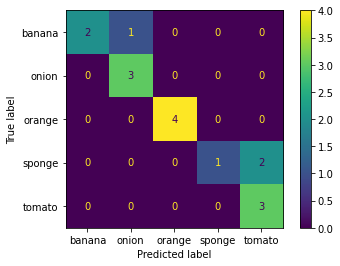

In [12]:
plot_confusion_matrix(clf, X_test, y_test)

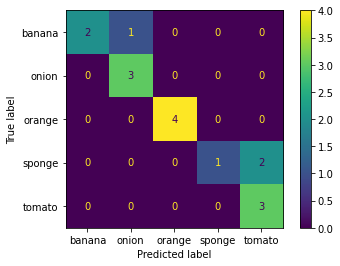

In [13]:
cm = plot_confusion_matrix(clf, X_test, y_test)
cm.figure_.savefig('conf_mat_no_features.png',dpi=300)

## with features

In [14]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f, y_train_f)
clf.score(X_test_f, y_test_f)

0.9375

In [20]:
print(classification_report(y_test_f, clf.predict(X_test_f)))

              precision    recall  f1-score   support

      banana       1.00      0.67      0.80         3
       onion       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         4
      sponge       1.00      1.00      1.00         3
      tomato       0.75      1.00      0.86         3

    accuracy                           0.94        16
   macro avg       0.95      0.93      0.93        16
weighted avg       0.95      0.94      0.94        16



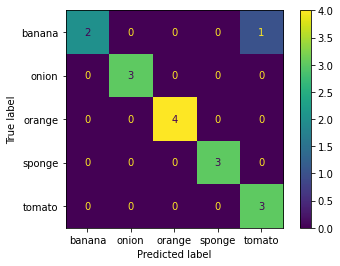

In [19]:
plot_confusion_matrix(clf, X_test_f, y_test_f)

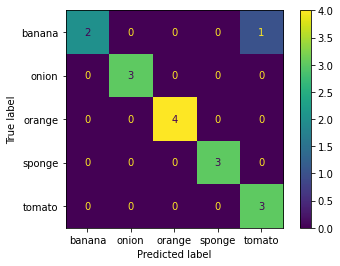

In [18]:
cm = plot_confusion_matrix(clf, X_test_f, y_test_f)
cm.figure_.savefig('conf_mat_with_features.png',dpi=300)

# BOSSEnsemble & ColumnEnsembleClassifier

In [ ]:
clf = ColumnEnsembleClassifier(estimators=[("TSF0", TimeSeriesForestClassifier(n_estimators=100), [0]),("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=5), [3]),])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [12]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00         2
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



---

---

# MrSEQLClassifier - univareate time serial classification not sutalble

In [96]:
clf = MrSEQLClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [99]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00         4
      orange       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [101]:
# Cannot plot confution matrix
# plot_confusion_matrix(clf, X_test, y_test)

# Plot 

In [11]:
# binary target variable
labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['banana' 'orange'] [12 12]


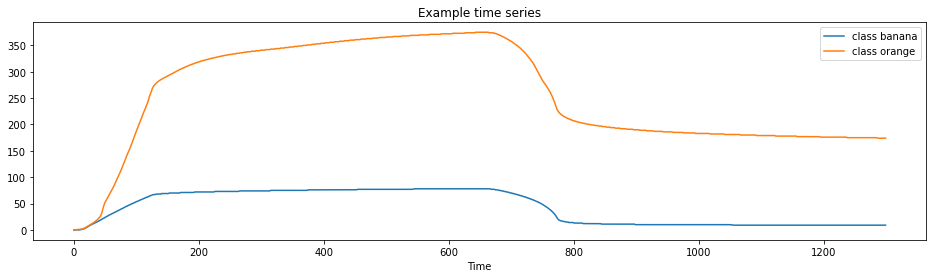

In [18]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    X_train.loc[y_train == label, "dim_3"].iloc[0].plot(ax=ax, label=f"class {label}")
plt.legend()
ax.set(title="Example time series", xlabel="Time");

## Feature extraction with sklearn

In [53]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

from sklearn.pipeline import make_pipeline
# with sktime, we can write this as a pipeline
from sktime.transformations.panel.reduce import Tabularizer
from sklearn.ensemble import RandomForestClassifier
from sktime.datatypes._panel._convert import from_nested_to_2d_array

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [64]:
# for univariate tdata this works 

#time_series_tree.fit(X_train, y_train)
#time_series_tree.score(X_test, y_test)

In [45]:
t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
Xtrain = t.fit_transform(X_train)
Xtest = t.fit_transform(X_test)

Xtrain.head()

Feature Extraction: 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


,dim_0__variance_larger_than_standard_deviation,dim_0__has_duplicate_max,dim_0__has_duplicate_min,dim_0__has_duplicate,dim_0__sum_values,dim_0__abs_energy,dim_0__mean_abs_change,dim_0__mean_change,dim_0__mean_second_derivative_central,dim_0__median,...,dim_3__fourier_entropy__bins_2,dim_3__fourier_entropy__bins_3,dim_3__fourier_entropy__bins_5,dim_3__fourier_entropy__bins_10,dim_3__fourier_entropy__bins_100,dim_3__permutation_entropy__dimension_3__tau_1,dim_3__permutation_entropy__dimension_4__tau_1,dim_3__permutation_entropy__dimension_5__tau_1,dim_3__permutation_entropy__dimension_6__tau_1,dim_3__permutation_entropy__dimension_7__tau_1
0,1.0,0.0,0.0,0.0,19378.299766,385719.044982,0.022964,0.022964,-2.023571e-07,14.899659,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.632483,0.823734,0.992637,1.146368,1.286073
1,1.0,0.0,0.0,0.0,19399.704880,386472.250313,0.022988,0.022988,-4.665996e-07,14.920211,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.822398,1.075686,1.268945,1.439496,1.589333
2,1.0,0.0,0.0,0.0,19544.830522,392358.198959,0.023126,0.023126,-4.901637e-08,15.073735,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.842623,1.090994,1.268684,1.429784,1.571572
3,1.0,0.0,0.0,0.0,19566.785652,393337.642628,0.023157,0.023157,-6.531864e-07,15.069535,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.822892,1.051292,1.215162,1.366163,1.503596
4,1.0,0.0,0.0,0.0,19524.785807,391290.401356,0.023136,0.023136,-3.488946e-07,15.005463,...,0.045395,0.045395,0.045395,0.125256,0.181214,0.645657,0.847281,1.019614,1.173998,1.313434


In [67]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(Xtrain, y_train, test_size=.2)


In [73]:
X_train_fs

,dim_0__variance_larger_than_standard_deviation,dim_0__has_duplicate_max,dim_0__has_duplicate_min,dim_0__has_duplicate,dim_0__sum_values,dim_0__abs_energy,dim_0__mean_abs_change,dim_0__mean_change,dim_0__mean_second_derivative_central,dim_0__median,...,dim_3__fourier_entropy__bins_2,dim_3__fourier_entropy__bins_3,dim_3__fourier_entropy__bins_5,dim_3__fourier_entropy__bins_10,dim_3__fourier_entropy__bins_100,dim_3__permutation_entropy__dimension_3__tau_1,dim_3__permutation_entropy__dimension_4__tau_1,dim_3__permutation_entropy__dimension_5__tau_1,dim_3__permutation_entropy__dimension_6__tau_1,dim_3__permutation_entropy__dimension_7__tau_1
6,1.0,0.0,0.0,0.0,19721.304000,398994.789642,0.023296,0.023296,-4.790636e-07,15.220156,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.813147,1.034359,1.213644,1.378383,1.521543
15,1.0,0.0,0.0,0.0,19558.433745,392991.128307,0.023157,0.023157,-8.878914e-07,15.065692,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.666204,0.857939,1.014788,1.150327,1.267684
4,1.0,0.0,0.0,0.0,19524.785807,391290.401356,0.023136,0.023136,-3.488946e-07,15.005463,...,0.045395,0.045395,0.045395,0.125256,0.181214,0.645657,0.847281,1.019614,1.173998,1.313434
10,1.0,0.0,0.0,0.0,19809.955724,402758.764982,0.023410,0.023410,-1.821377e-07,15.288749,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.811119,1.058660,1.253513,1.422627,1.558139
16,1.0,0.0,0.0,0.0,19485.788332,390031.822558,0.023116,0.023116,-8.764312e-07,14.965321,...,0.045395,0.090729,0.090729,0.090729,0.361435,0.338032,0.386251,0.426981,0.463443,0.495168
9,1.0,0.0,0.0,0.0,19567.402542,393070.904997,0.023180,0.023180,-2.218084e-07,15.044804,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.791889,1.058371,1.262056,1.444229,1.616608
2,1.0,0.0,0.0,0.0,19544.830522,392358.198959,0.023126,0.023126,-4.901637e-08,15.073735,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.842623,1.090994,1.268684,1.429784,1.571572
12,1.0,0.0,0.0,0.0,19305.437021,382740.733546,0.022897,0.022897,-4.113527e-07,14.831833,...,0.045395,0.045395,0.045395,0.125256,0.181214,0.435057,0.550535,0.638111,0.720644,0.796476
13,1.0,0.0,0.0,0.0,19477.822040,389961.648751,0.023123,0.023123,-2.357793e-07,14.960650,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.597924,0.780730,0.915960,1.046051,1.157014
3,1.0,0.0,0.0,0.0,19566.785652,393337.642628,0.023157,0.023157,-6.531864e-07,15.069535,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.822892,1.051292,1.215162,1.366163,1.503596


In [82]:
from sklearn.metrics import classification_report

classifier_full = DecisionTreeClassifier()
classifier_full.fit(X_train_fs, y_train_fs)
print(classifier_full.score(X_train_fs, y_train_fs))
print(classification_report(y_test_fs, classifier_full.predict(X_test_fs)))



1.0
              precision    recall  f1-score   support

      banana       0.80      1.00      0.89         4
      orange       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

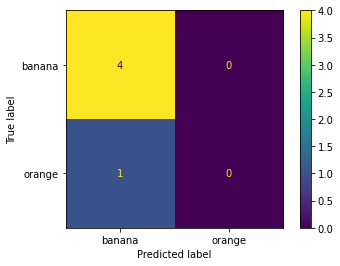

In [94]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier_full, X_test_fs, y_test_fs)

### Time series forest

In [75]:
from sktime.classification.compose import ComposableTimeSeriesForestClassifier

In [77]:
tsf = ComposableTimeSeriesForestClassifier(
    estimator=time_series_tree,
    n_estimators=100,
    bootstrap=True,
    oob_score=True,
    random_state=1,
    n_jobs=-1,
)

In [78]:
tsf.fit(X_train, y_train)

if tsf.oob_score:
    print(tsf.oob_score_)

ValueError: X must be univariate with X.shape[1] == 1, but found: X.shape[1] == 4.

In [38]:
# remove NaN

#from tsfresh import select_features
#from tsfresh.utilities.dataframe_functions import impute

#impute(Xt)    #impute(extracted_features)
#features_filtered = select_features(Xt, y_train)   #select_features(extracted_features, y)

In [66]:
#this is for ts file formet without feature extreacted 

#classifier = make_pipeline(TSFreshFeatureExtractor(show_warnings=False), RandomForestClassifier())
#classifier.fit(Xtrain, y_train)   
#classifier.score(Xtest, y_test)

# Trying out other Classification 

In [35]:
from sktime.datatypes._panel._convert import from_nested_to_2d_array

X_train_tab = from_nested_to_2d_array(X_train)
X_test_tab = from_nested_to_2d_array(X_test)

X_train_tab.head()

,dim_0__0,dim_0__1,dim_0__2,dim_0__3,dim_0__4,dim_0__5,dim_0__6,dim_0__7,dim_0__8,dim_0__9,...,dim_3__1290,dim_3__1291,dim_3__1292,dim_3__1293,dim_3__1294,dim_3__1295,dim_3__1296,dim_3__1297,dim_3__1298,dim_3__1299
0,0.012543,0.036043,0.059006,0.081902,0.104850,0.127903,0.150813,0.173717,0.196644,0.219587,...,174.0,174.0,174.0,174.0,174.0,174.0,174.0000,174.0,174.0,174.0
1,0.014375,0.038606,0.061539,0.084415,0.107317,0.130247,0.153141,0.176039,0.198917,0.221800,...,113.0,113.0,113.0,113.0,113.0,113.0,113.0000,113.0,113.0,113.0
2,0.012467,0.035841,0.058735,0.081596,0.104467,0.127406,0.150281,0.173147,0.196019,0.218881,...,112.0,112.0,112.0,112.0,112.0,112.0,112.0000,112.0,112.0,112.0
3,0.014958,0.039726,0.062717,0.085645,0.108565,0.131512,0.154458,0.177379,0.200304,0.223222,...,77.0,77.0,77.0,77.0,77.0,77.0,76.1355,76.0,76.0,76.0
4,0.013773,0.037796,0.061035,0.084175,0.107401,0.130678,0.153766,0.176883,0.200145,0.223457,...,254.0,254.0,254.0,254.0,254.0,254.0,253.4630,253.0,253.0,253.0


In [34]:
features_filtered

""
0
1
2
3
4
5
6
7
8
9


In [22]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train_tab, y_train)
dummy_clf.score(X_test_tab, y_test)

0.5

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rand_clf = RandomForestClassifier(n_estimators=100)
rand_clf.fit(X_train_tab, y_train)
y_predict = rand_clf.predict(X_test_tab)

print("Accuracy:",metrics.accuracy_score(y_test,y_predict))


Accuracy: 1.0


# Feature importance identification 

In [3]:
X_f

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8
0,0 0.009640 1 0.027272 2 0...,0 0.019451 1 0.056479 2 0.09...,0 9.340669e-03 1 4.106114e-02 2 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.000000 1 -0.000510 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0.00...
1,0 0.011247 1 0.029827 2 0...,0 0.022876 1 0.061897 2 0.09...,0 1.207267e-02 1 4.631234e-02 2 ...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000627 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
2,0 0.009574 1 0.027116 2 0...,0 0.019307 1 0.056146 2 0.09...,0 9.229251e-03 1 4.073785e-02 2 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.000000 1 -0.000504 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
3,0 0.011622 1 0.030964 2 0...,0 0.023693 1 0.064318 2 0.10...,0 0.012802 1 0.048674 2 0.08...,0 0.00 1 0.00 2 0.00 3 ...,0 0.000000 1 -0.000674 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
4,0 0.010735 1 0.028944 2 0...,0 0.024828 1 0.068531 2 0.11...,0 0.012662 1 0.050783 2 0.07...,0 0.000000 1 0.000000 2 0.00...,0 0.000000 1 -0.000586 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0.00...
...,...,...,...,...,...,...,...,...,...
73,0 0.011661 1 0.031378 2 0...,0 0.030444 1 0.083687 2 0.13...,0 0.016455 1 0.063548 2 0.11...,0 0.000000 1 0.000000 2 0.00...,0 0.000000 1 -0.000690 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
74,0 0.010667 1 0.028665 2 0...,0 0.027757 1 0.076353 2 0.12...,0 0.014080 1 0.056403 2 0.10...,0 0.000000 1 0.000000 2 0.00...,0 0.000000 1 -0.000576 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
75,0 0.010603 1 0.028651 2 0...,0 0.030633 1 0.084779 2 0.13...,0 0.015481 1 0.062614 2 0.11...,0 0.00 1 0.00 2 0.00 3 ...,0 0.000000 1 -0.000574 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
76,0 0.010019 1 0.027697 2 0...,0 0.028720 1 0.081752 2 0.13...,0 0.013990 1 0.059686 2 0.11...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000531 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...


In [4]:
y_f

array(['orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'banana', 'banana',
       'banana', 'banana', 'banana', 'banana', 'banana', 'banana',
       'banana', 'banana', 'banana', 'banana', 'banana', 'banana',
       'banana', 'banana', 'sponge', 'sponge', 'sponge', 'sponge',
       'sponge', 'sponge', 'sponge', 'sponge', 'sponge', 'sponge',
       'sponge', 'sponge', 'sponge', 'sponge', 'sponge', 'onion', 'onion',
       'onion', 'onion', 'onion', 'onion', 'onion', 'onion', 'onion',
       'onion', 'onion', 'onion', 'onion', 'onion', 'onion', 'onion',
       'tomato', 'tomato', 'tomato', 'tomato', 'tomato', 'tomato',
       'tomato', 'tomato', 'tomato', 'tomato', 'tomato', 'tomato',
       'tomato', 'tomato', 'tomato'], dtype='<U6')

# Permutation Importance Method

Calculate classification accurasy using every permutation of dataset and calculate the accurasy 

In [9]:
# featur names get in to array

dim = ['dim_0','dim_1','dim_2','dim_3','dim_4','dim_5','dim_6','dim_7','dim_8']

In [10]:
# creating pipeline 

steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)

In [11]:
print ( X_train_f.shape , X_test_f.shape, y_train_f.shape, y_test_f.shape )  

(62, 9) (16, 9) (62,) (16,)


In [16]:
# 1

x = 1


pos0 = 1 #time
pos1 = 1
pos2 = 1
pos3 = 1
pos4 = 1
pos5 = 1
pos6 = 1
pos7 = 1
pos8 = 1



a = 0
for x in range (1,9):
    X_train_f_drop_X = X_train_f.drop(dim[x],axis=1)
    X_test_f_drop_X = X_test_f.drop(dim[x],axis=1)
    
    if (x == 1):
        pos1 = 0 # force command
    if (x == 2):
        pos2 = 0 # force responce
    if (x == 3):
        pos3 = 0 # Position
    if (x == 4):
        pos4 = 0 # velocity
    if (x == 5):
        pos5 = 0 # accleration
    if (x == 6):
        pos6 = 0 # stiffness
    if (x == 7):
        pos7 = 0 # viscosity
    if (x == 8):
        pos8 = 0 # Energy absorbed     
    index = pos0 + pos1*2 + pos2*4 + pos3*8 + pos4*16 + pos5*32 + pos6*64 + pos7*128 + pos8*256
    clf.fit(X_train_f_drop_X , y_train_f)
    filePointer = open('pout2.csv','a')
    writer = csv.writer(filePointer)
    data = [a, index, pos0, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8,  clf.score(X_test_f_drop_X, y_test_f)]
    writer.writerow(data)
    f.close()
    print(data)
    a=a+1
    pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1
    
    

[0, 509, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1.0]
[1, 507, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1.0]
[2, 503, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0.875]
[3, 495, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0.875]
[4, 479, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0.875]
[5, 447, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0.9375]
[6, 383, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1.0]
[7, 255, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0.9375]


In [17]:
# 2

x = 1
y = 2
z = 3
p = 4
q = 0
r = 0

pos0 = 1 #time
pos1 = 1
pos2 = 1
pos3 = 1
pos4 = 1
pos5 = 1
pos6 = 1
pos7 = 1
pos8 = 1


a = 0
for x in range (1,9):
    X_train_f_drop_X = X_train_f.drop(dim[x],axis=1)
    X_test_f_drop_X = X_test_f.drop(dim[x],axis=1)
    for y in range (x+1,9):
        X_train_f_drop_X = X_train_f.drop(dim[y],axis=1)
        X_test_f_drop_X = X_test_f.drop(dim[y],axis=1)
        if (x == 1 or y == 1 or z == 1 or p == 1 or q == 1 ):
            pos1 = 0 # force command
        if (x == 2 or y == 2 or z == 2 or p == 2 or q == 2 ):
            pos2 = 0 # force responce
        if (x == 3 or y == 3 or z == 3 or p == 3 or q == 3  ):
            pos3 = 0 # Position
        if (x == 4 or y == 4 or z == 4 or p == 4 or q == 4 ):
            pos4 = 0 # velocity
        if (x == 5 or y == 5 or z == 5 or p == 5 or q == 5 ):
            pos5 = 0 # accleration
        if (x == 6 or y == 6 or z == 6 or p == 6 or q == 6 ):
            pos6 = 0 # stiffness
        if (x == 7 or y == 7 or z == 7 or p == 7 or q == 7 ):
            pos7 = 0 # viscosity
        if (x == 8 or y == 8 or z == 8 or p == 8 or q == 8 ):
            pos8 = 0 # Energy absorbed
        index = pos0 + pos1*2 + pos2*4 + pos3*8 + pos4*16 + pos5*32 + pos6*64 + pos7*128 + pos8*256
        clf.fit(X_train_f_drop_X , y_train_f)
        filePointer = open('pout2.csv','a')
        writer = csv.writer(filePointer)
        data = [a, index, pos0, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8,  clf.score(X_test_f_drop_X, y_test_f)]
        writer.writerow(data)
        f.close()
        print(data)
        a=a+1
        pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1
        
        

[0, 481, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0.8125]
[1, 485, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0.875]
[2, 485, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0.875]
[3, 453, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1.0]
[4, 421, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0.8125]
[5, 357, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1.0]
[6, 229, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0.9375]
[7, 483, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0.75]
[8, 483, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0.9375]
[9, 451, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0.9375]
[10, 419, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1.0]
[11, 355, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0.9375]
[12, 227, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0.9375]
[13, 487, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0.9375]
[14, 455, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0.9375]
[15, 423, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0.875]
[16, 359, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0.9375]
[17, 231, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0.9375]
[18, 455, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1.0]
[19, 423, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0.9375]
[20, 359, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1.0]
[21, 231, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0.9375]
[22, 391, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1.0

In [18]:
# 3

x = 1
y = 2
z = 3
p = 4
q = 0
r = 0

pos0 = 1 #time
pos1 = 1
pos2 = 1
pos3 = 1
pos4 = 1
pos5 = 1
pos6 = 1
pos7 = 1
pos8 = 1


a = 0
for x in range (1,9):
    X_train_f_drop_X = X_train_f.drop(dim[x],axis=1)
    X_test_f_drop_X = X_test_f.drop(dim[x],axis=1)
    for y in range (x+1,9):
        X_train_f_drop_X = X_train_f.drop(dim[y],axis=1)
        X_test_f_drop_X = X_test_f.drop(dim[y],axis=1)
        for z in range (y+1,9):
            X_train_f_drop_X = X_train_f.drop(dim[z],axis=1)
            X_test_f_drop_X = X_test_f.drop(dim[z],axis=1)
            if (x == 1 or y == 1 or z == 1 or p == 1 or q == 1 ):
                pos1 = 0 # force command
            if (x == 2 or y == 2 or z == 2 or p == 2 or q == 2 ):
                pos2 = 0 # force responce
            if (x == 3 or y == 3 or z == 3 or p == 3 or q == 3  ):
                pos3 = 0 # Position
            if (x == 4 or y == 4 or z == 4 or p == 4 or q == 4 ):
                pos4 = 0 # velocity
            if (x == 5 or y == 5 or z == 5 or p == 5 or q == 5 ):
                pos5 = 0 # accleration
            if (x == 6 or y == 6 or z == 6 or p == 6 or q == 6 ):
                pos6 = 0 # stiffness
            if (x == 7 or y == 7 or z == 7 or p == 7 or q == 7 ):
                pos7 = 0 # viscosity
            if (x == 8 or y == 8 or z == 8 or p == 8 or q == 8 ):
                pos8 = 0 # Energy absorbed
            index = pos0 + pos1*2 + pos2*4 + pos3*8 + pos4*16 + pos5*32 + pos6*64 + pos7*128 + pos8*256
            clf.fit(X_train_f_drop_X , y_train_f)
            filePointer = open('pout2.csv','a')
            writer = csv.writer(filePointer)
            data = [a, index, pos0, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8,  clf.score(X_test_f_drop_X, y_test_f)]
            writer.writerow(data)
            f.close()
            print(data)
            a=a+1
            pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1

[0, 481, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1.0]
[1, 489, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0.875]
[2, 457, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0.9375]
[3, 425, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0.9375]
[4, 361, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0.875]
[5, 233, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0.9375]
[6, 485, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0.875]
[7, 453, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1.0]
[8, 421, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0.875]
[9, 357, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1.0]
[10, 229, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0.9375]
[11, 461, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0.875]
[12, 429, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1.0]
[13, 365, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0.875]
[14, 237, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0.9375]
[15, 397, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0.9375]
[16, 333, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1.0]
[17, 205, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0.9375]
[18, 301, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0.9375]
[19, 173, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0.9375]
[20, 109, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0.9375]
[21, 483, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0.9375]
[22, 451, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0.93

In [19]:
# 4

x = 1
y = 2
z = 3
p = 4
q = 0
r = 0

pos0 = 1 #time
pos1 = 1
pos2 = 1
pos3 = 1
pos4 = 1
pos5 = 1
pos6 = 1
pos7 = 1
pos8 = 1


a = 0
for x in range (1,9):
    X_train_f_drop_X = X_train_f.drop(dim[x],axis=1)
    X_test_f_drop_X = X_test_f.drop(dim[x],axis=1)
    for y in range (x+1,9):
        X_train_f_drop_X = X_train_f.drop(dim[y],axis=1)
        X_test_f_drop_X = X_test_f.drop(dim[y],axis=1)
        for z in range (y+1,9):
            X_train_f_drop_X = X_train_f.drop(dim[z],axis=1)
            X_test_f_drop_X = X_test_f.drop(dim[z],axis=1)
            for p in range (z+1,9):
                X_train_f_drop_X = X_train_f.drop(dim[p],axis=1)
                X_test_f_drop_X = X_test_f.drop(dim[p],axis=1)
                if (x == 1 or y == 1 or z == 1 or p == 1 or q == 1 ):
                    pos1 = 0 # force command
                if (x == 2 or y == 2 or z == 2 or p == 2 or q == 2 ):
                    pos2 = 0 # force responce
                if (x == 3 or y == 3 or z == 3 or p == 3 or q == 3  ):
                    pos3 = 0 # Position
                if (x == 4 or y == 4 or z == 4 or p == 4 or q == 4 ):
                    pos4 = 0 # velocity
                if (x == 5 or y == 5 or z == 5 or p == 5 or q == 5 ):
                    pos5 = 0 # accleration
                if (x == 6 or y == 6 or z == 6 or p == 6 or q == 6 ):
                    pos6 = 0 # stiffness
                if (x == 7 or y == 7 or z == 7 or p == 7 or q == 7 ):
                    pos7 = 0 # viscosity
                if (x == 8 or y == 8 or z == 8 or p == 8 or q == 8 ):
                    pos8 = 0 # Energy absorbed
                index = pos0 + pos1*2 + pos2*4 + pos3*8 + pos4*16 + pos5*32 + pos6*64 + pos7*128 + pos8*256
                clf.fit(X_train_f_drop_X , y_train_f)
                filePointer = open('pout2.csv','a')
                writer = csv.writer(filePointer)
                data = [a, index, pos0, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8,  clf.score(X_test_f_drop_X, y_test_f)]
                writer.writerow(data)
                f.close()
                print(data)
                a=a+1
                pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1


[0, 481, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0.875]
[1, 465, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0.9375]
[2, 433, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0.9375]
[3, 369, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0.9375]
[4, 241, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0.9375]
[5, 457, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0.9375]
[6, 425, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0.9375]
[7, 361, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0.9375]
[8, 233, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0.9375]
[9, 409, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0.9375]
[10, 345, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0.875]
[11, 217, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0.9375]
[12, 313, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0.875]
[13, 185, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0.9375]
[14, 121, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0.9375]
[15, 453, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1.0]
[16, 421, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1.0]
[17, 357, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0.9375]
[18, 229, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0.9375]
[19, 405, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1.0]
[20, 341, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0.9375]
[21, 213, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0.9375]
[22, 309, 1, 0, 1, 0, 1, 1, 0, 0

In [35]:
# 5
# Round1 done on 08.12.2022
# Round2 notdone on 12.12.2022

x = 1
y = 2
z = 3
p = 4
q = 0
r = 0

pos0 = 1 #time
pos1 = 1
pos2 = 1
pos3 = 1
pos4 = 1
pos5 = 1
pos6 = 1
pos7 = 1
pos8 = 1

a = 0
pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1


for x in range (1,9):
    X_train_f_drop_X = X_train_f.drop(dim[x],axis=1)
    X_test_f_drop_X = X_test_f.drop(dim[x],axis=1)
    for y in range (x+1,9):
        X_train_f_drop_X = X_train_f.drop(dim[y],axis=1)
        X_test_f_drop_X = X_test_f.drop(dim[y],axis=1)
        for z in range (y+1,9):
            X_train_f_drop_X = X_train_f.drop(dim[z],axis=1)
            X_test_f_drop_X = X_test_f.drop(dim[z],axis=1)
            for p in range (z+1,9):
                X_train_f_drop_X = X_train_f.drop(dim[p],axis=1)
                X_test_f_drop_X = X_test_f.drop(dim[p],axis=1)
                for q in range (p+1,9):
                    X_train_f_drop_X = X_train_f.drop(dim[q],axis=1)
                    X_test_f_drop_X = X_test_f.drop(dim[q],axis=1)
                    if (x == 1 or y == 1 or z == 1 or p == 1 or q == 1 ):
                        pos1 = 0 # force command
                    if (x == 2 or y == 2 or z == 2 or p == 2 or q == 2 ):
                        pos2 = 0 # force responce
                    if (x == 3 or y == 3 or z == 3 or p == 3 or q == 3  ):
                        pos3 = 0 # Position
                    if (x == 4 or y == 4 or z == 4 or p == 4 or q == 4 ):
                        pos4 = 0 # velocity
                    if (x == 5 or y == 5 or z == 5 or p == 5 or q == 5 ):
                        pos5 = 0 # accleration
                    if (x == 6 or y == 6 or z == 6 or p == 6 or q == 6 ):
                        pos6 = 0 # stiffness
                    if (x == 7 or y == 7 or z == 7 or p == 7 or q == 7 ):
                        pos7 = 0 # viscosity
                    if (x == 8 or y == 8 or z == 8 or p == 8 or q == 8 ):
                        pos8 = 0 # Energy absorbed
                    
                    index = pos0 + pos1*2 + pos2*4 + pos3*8 + pos4*16 + pos5*32 + pos6*64 + pos7*128 + pos8*256
                    clf.fit(X_train_f_drop_X , y_train_f)
                    filePointer = open('pout1.csv', 'a')
                    writer = csv.writer(filePointer)
                    data = [a, index, pos0, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8,  clf.score(X_test_f_drop_X, y_test_f)]
                    writer.writerow(data)
                    f.close()
                    print(data)
                    a=a+1
                    pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1


[0, 449, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0.8125]
[1, 417, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0.9375]
[2, 353, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1.0]
[3, 225, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0.9375]
[4, 401, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0.9375]
[5, 337, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1.0]
[6, 209, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0.9375]
[7, 305, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0.9375]
[8, 177, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0.9375]
[9, 113, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0.9375]
[10, 393, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0.9375]
[11, 329, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0.875]
[12, 201, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0.9375]
[13, 297, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1.0]
[14, 169, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0.875]
[15, 105, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0.9375]
[16, 281, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0.8125]
[17, 153, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0.9375]
[18, 89, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0.9375]
[19, 57, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0.9375]
[20, 389, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1.0]
[21, 325, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0.875]
[22, 197, 1, 0, 1, 0, 0, 0, 1, 1, 0, 

In [36]:
# 6
# Round1 done on 08.12.2022

x = 1
y = 2
z = 3
p = 4
q = 0
r = 0

pos0 = 1 #time
pos1 = 1
pos2 = 1
pos3 = 1
pos4 = 1
pos5 = 1
pos6 = 1
pos7 = 1
pos8 = 1


filePointer = open('pout1.csv', 'a')
writer = csv.writer(filePointer)
x=6
data = [x]
writer.writerow(data)
f.close()


a = 0
pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1

for x in range (1,9):
    X_train_f_drop_X = X_train_f.drop(dim[x],axis=1)
    X_test_f_drop_X = X_test_f.drop(dim[x],axis=1)
    for y in range (x+1,9):
        X_train_f_drop_X = X_train_f.drop(dim[y],axis=1)
        X_test_f_drop_X = X_test_f.drop(dim[y],axis=1)
        for z in range (y+1,9):
            X_train_f_drop_X = X_train_f.drop(dim[z],axis=1)
            X_test_f_drop_X = X_test_f.drop(dim[z],axis=1)
            for p in range (z+1,9):
                X_train_f_drop_X = X_train_f.drop(dim[p],axis=1)
                X_test_f_drop_X = X_test_f.drop(dim[p],axis=1)
                for q in range (p+1,9):
                    X_train_f_drop_X = X_train_f.drop(dim[q],axis=1)
                    X_test_f_drop_X = X_test_f.drop(dim[q],axis=1)
                    for r in range (q+1,9):
                        X_train_f_drop_X = X_train_f.drop(dim[r],axis=1)
                        X_test_f_drop_X = X_test_f.drop(dim[r],axis=1)
                        
                        if (x == 1 or y == 1 or z == 1 or p == 1 or q == 1 or r == 1 ):
                            pos1 = 0 # force command
                        if (x == 2 or y == 2 or z == 2 or p == 2 or q == 2 or r == 2 ):
                            pos2 = 0 # force responce
                        if (x == 3 or y == 3 or z == 3 or p == 3 or q == 3 or r == 3 ):
                            pos3 = 0 # Position
                        if (x == 4 or y == 4 or z == 4 or p == 4 or q == 4 or r == 4 ):
                            pos4 = 0 # velocity
                        if (x == 5 or y == 5 or z == 5 or p == 5 or q == 5 or r == 5 ):
                            pos5 = 0 # accleration
                        if (x == 6 or y == 6 or z == 6 or p == 6 or q == 6 or r == 6 ):
                            pos6 = 0 # stiffness
                        if (x == 7 or y == 7 or z == 7 or p == 7 or q == 7 or r == 7 ):
                            pos7 = 0 # viscosity
                        if (x == 8 or y == 8 or z == 8 or p == 8 or q == 8 or r == 8 ):
                            pos8 = 0 # Energy absorbed
                        index = pos0 + pos1*2 + pos2*4 + pos3*8 + pos4*16 + pos5*32 + pos6*64 + pos7*128 + pos8*256
                        clf.fit(X_train_f_drop_X , y_train_f)
                        filePointer = open('pout1.csv', 'a')
                        writer = csv.writer(filePointer)
                        data = [a, index, pos0, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8,  clf.score(X_test_f_drop_X, y_test_f)]
                        writer.writerow(data)
                        f.close()
                        print(data)
                        a=a+1
                        pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1

[0, 385, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0.875]
[1, 321, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0.9375]
[2, 193, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0.9375]
[3, 289, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1.0]
[4, 161, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0.9375]
[5, 97, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0.9375]
[6, 273, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0.875]
[7, 145, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0.9375]
[8, 81, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0.9375]
[9, 49, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0.9375]
[10, 265, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1.0]
[11, 137, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0.9375]
[12, 73, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0.9375]
[13, 41, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0.9375]
[14, 25, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0.9375]
[15, 261, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1.0]
[16, 133, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0.9375]
[17, 69, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0.9375]
[18, 37, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0.9375]
[19, 21, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0.9375]
[20, 13, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0.9375]
[21, 259, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1.0]
[22, 131, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0.9375]

In [37]:
# 7

x = 1
y = 2
z = 3
p = 4
q = 0
r = 0
s = 0

pos0 = 1 #time
pos1 = 1
pos2 = 1
pos3 = 1
pos4 = 1
pos5 = 1
pos6 = 1
pos7 = 1
pos8 = 1


filePointer = open('pout1.csv', 'a')
writer = csv.writer(filePointer)
x=7
data = [x]
writer.writerow(data)
f.close()

a = 0
pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1

for x in range (1,9):
    X_train_f_drop_X = X_train_f.drop(dim[x],axis=1)
    X_test_f_drop_X = X_test_f.drop(dim[x],axis=1)
    for y in range (x+1,9):
        X_train_f_drop_X = X_train_f.drop(dim[y],axis=1)
        X_test_f_drop_X = X_test_f.drop(dim[y],axis=1)
        for z in range (y+1,9):
            X_train_f_drop_X = X_train_f.drop(dim[z],axis=1)
            X_test_f_drop_X = X_test_f.drop(dim[z],axis=1)
            for p in range (z+1,9):
                X_train_f_drop_X = X_train_f.drop(dim[p],axis=1)
                X_test_f_drop_X = X_test_f.drop(dim[p],axis=1)
                for q in range (p+1,9):
                    X_train_f_drop_X = X_train_f.drop(dim[q],axis=1)
                    X_test_f_drop_X = X_test_f.drop(dim[q],axis=1)
                    for r in range (q+1,9):
                        X_train_f_drop_X = X_train_f.drop(dim[r],axis=1)
                        X_test_f_drop_X = X_test_f.drop(dim[r],axis=1)
                        for s in range (r+1,9):
                            X_train_f_drop_X = X_train_f.drop(dim[s],axis=1)
                            X_test_f_drop_X = X_test_f.drop(dim[s],axis=1)
                            if (x == 1 or y == 1 or z == 1 or p == 1 or q == 1 or r == 1 or s == 1 ):
                                pos1 = 0 # force command
                            if (x == 2 or y == 2 or z == 2 or p == 2 or q == 2 or r == 2 or s == 2 ):
                                pos2 = 0 # force responce
                            if (x == 3 or y == 3 or z == 3 or p == 3 or q == 3 or r == 3 or s == 3 ):
                                pos3 = 0 # Position
                            if (x == 4 or y == 4 or z == 4 or p == 4 or q == 4 or r == 4 or s == 4 ):
                                pos4 = 0 # velocity
                            if (x == 5 or y == 5 or z == 5 or p == 5 or q == 5 or r == 5 or s == 5 ):
                                pos5 = 0 # accleration
                            if (x == 6 or y == 6 or z == 6 or p == 6 or q == 6 or r == 6 or s == 6 ):
                                pos6 = 0 # stiffness
                            if (x == 7 or y == 7 or z == 7 or p == 7 or q == 7 or r == 7 or s == 7 ):
                                pos7 = 0 # viscosity
                            if (x == 8 or y == 8 or z == 8 or p == 8 or q == 8 or r == 8 or s == 8 ):
                                pos8 = 0 # Energy absorbed
                            index = pos0 + pos1*2 + pos2*4 + pos3*8 + pos4*16 + pos5*32 + pos6*64 + pos7*128 + pos8*256
                            clf.fit(X_train_f_drop_X , y_train_f)
                            filePointer = open('pout1.csv', 'a')
                            writer = csv.writer(filePointer)
                            data = [a, index, pos0, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8,  clf.score(X_test_f_drop_X, y_test_f)]
                            writer.writerow(data)
                            f.close()
                            print(data)
                            a=a+1
                            pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1

[0, 257, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0.9375]
[1, 129, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0.9375]
[2, 65, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0.9375]
[3, 33, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0.9375]
[4, 17, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0.9375]
[5, 9, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0.9375]
[6, 5, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0.9375]
[7, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0.9375]
